In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
%pylab inline
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
from sklearn.metrics import confusion_matrix, classification_report 

Populating the interactive namespace from numpy and matplotlib


#Spiliting the dataset into Training and testing

In [3]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

#Building the Model with Only 2- Layers using Keras

In [14]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.4877 - acc: 0.8529 - val_loss: 0.1627 - val_acc: 0.9484
Epoch 2/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.2313 - acc: 0.9299 - val_loss: 0.1130 - val_acc: 0.9626
Epoch 3/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1755 - acc: 0.9467 - val_loss: 0.0919 - val_acc: 0.9709
Epoch 4/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1520 - acc: 0.9541 - val_loss: 0.0843 - val_acc: 0.9718
Epoch 5/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.1310 - acc: 0.9607 - val_loss: 0.0819 - val_acc: 0.9726
Epoch 6/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1168 - acc: 0.9638 - val_loss: 0.0744 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.1041 - acc: 0.9682 - val_loss: 0.

Test score: 0.06074915354180557
Test accuracy: 0.9829


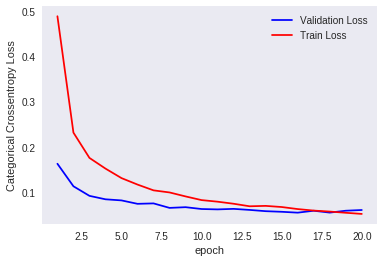

In [15]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


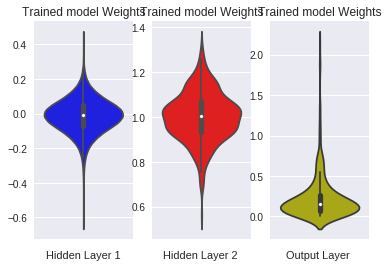

In [16]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
y_hat=model_relu.predict(X_test,batch_size=128)
snn_predicted = np.argmax(y_hat, axis=1)



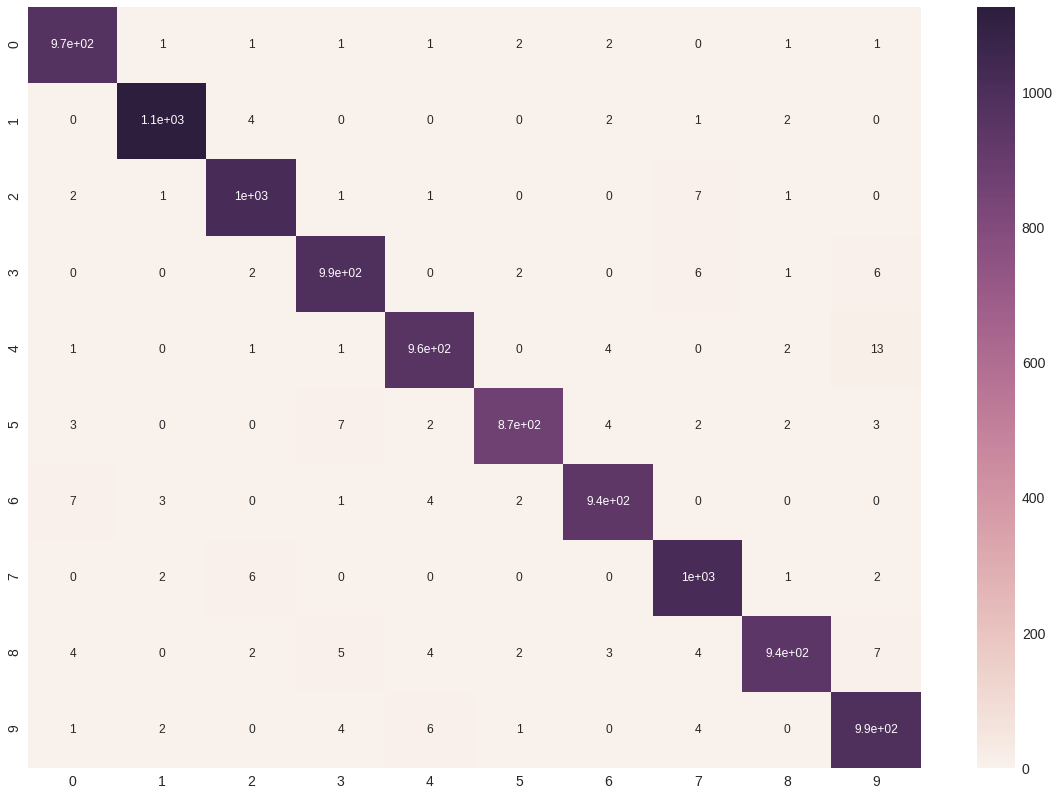

In [18]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(Y_test, axis=1), snn_predicted) 

# Visualiamos la matriz de confusión 
snn_df_cm = pd.DataFrame(snn_cm, range(10), range(10)) 
plt.figure(figsize = (20,14)) 
sns.set(font_scale=1.4) #for label size 
sns.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size 
plt.show()

In [19]:
snn_report = classification_report(np.argmax(Y_test, axis=1), snn_predicted)
print(snn_report)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.99      0.99      1032
          3       0.98      0.98      0.98      1010
          4       0.98      0.98      0.98       982
          5       0.99      0.97      0.98       892
          6       0.98      0.98      0.98       958
          7       0.98      0.99      0.98      1028
          8       0.99      0.97      0.98       974
          9       0.97      0.98      0.98      1009

avg / total       0.98      0.98      0.98     10000



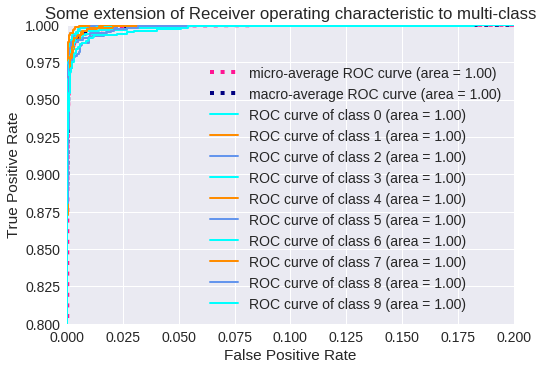

In [20]:
lw=2
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=Y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_hat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_hat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


#***************************
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#Building the Model with Only 3- Layers using Keras

In [32]:
model_relu_3 = Sequential()
model_relu_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dropout(0.5))
model_relu_3.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dropout(0.5))
model_relu_3.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu_3.add(BatchNormalization())
model_relu_3.add(Dropout(0.5))
model_relu_3.add(Dense(output_dim, activation='softmax'))

model_relu_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 221us/step - loss: 0.6910 - acc: 0.7871 - val_loss: 0.1861 - val_acc: 0.9417
Epoch 2/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.2953 - acc: 0.9129 - val_loss: 0.1396 - val_acc: 0.9582
Epoch 3/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.2227 - acc: 0.9336 - val_loss: 0.1174 - val_acc: 0.9626
Epoch 4/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.1863 - acc: 0.9458 - val_loss: 0.0979 - val_acc: 0.9704
Epoch 5/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.1619 - acc: 0.9530 - val_loss: 0.0847 - val_acc: 0.9732
Epoch 6/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.1434 - acc: 0.9572 - val_loss: 0.0839 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.1336 - acc: 0.9602 - val_loss: 0.

Test score: 0.06597275280430331
Test accuracy: 0.9822


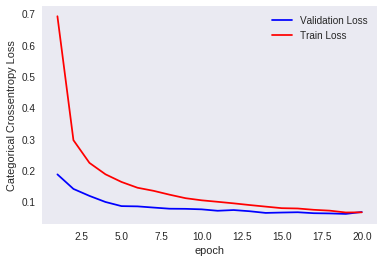

In [33]:
score = model_relu_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


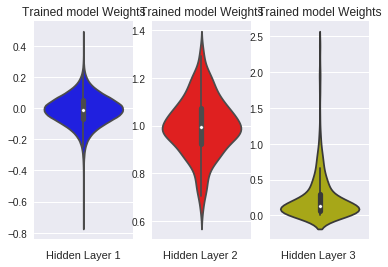

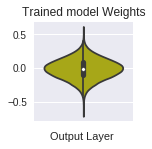

In [34]:
w_after = model_relu_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')
plt.show()

plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

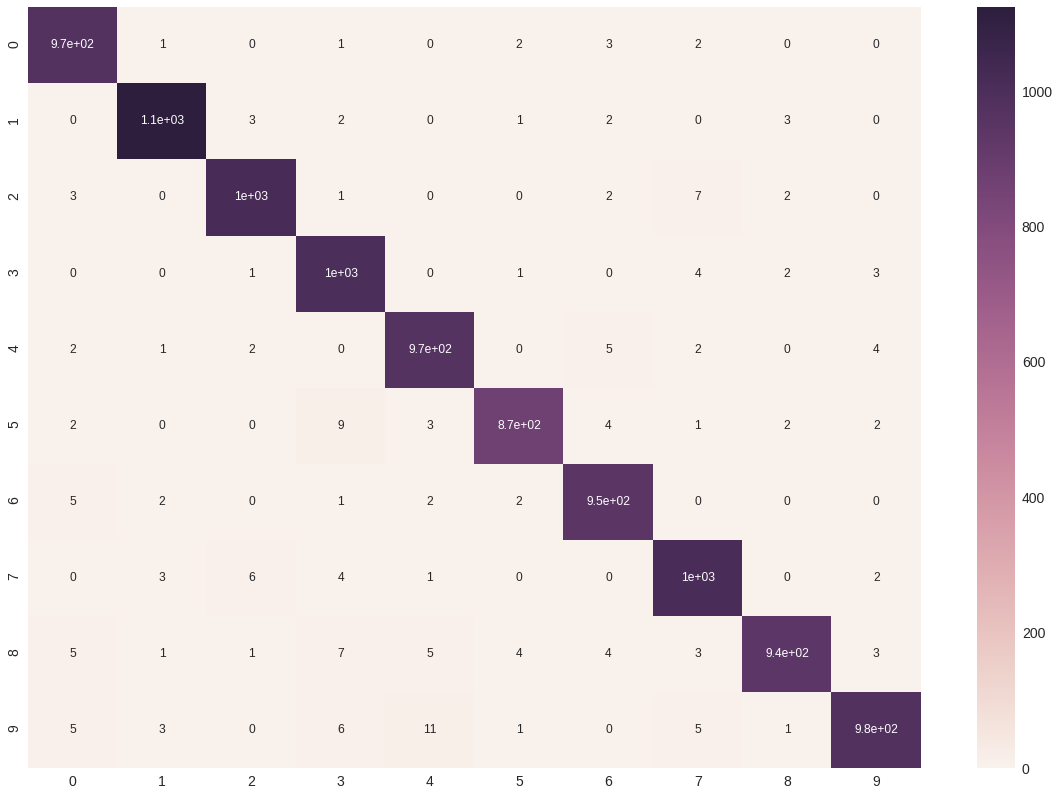

In [45]:
y_hat=model_relu_3.predict_proba(X_test)
snn_predicted = np.argmax(y_hat, axis=1)
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(Y_test, axis=1), snn_predicted) 

# Visualiamos la matriz de confusión 
snn_df_cm = pd.DataFrame(snn_cm, range(10), range(10)) 
plt.figure(figsize = (20,14)) 
sns.set(font_scale=1.4) #for label size 
sns.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size 
plt.show()

In [46]:
snn_report = classification_report(np.argmax(Y_test, axis=1), snn_predicted)
print(snn_report)

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.97      0.99      0.98      1010
          4       0.98      0.98      0.98       982
          5       0.99      0.97      0.98       892
          6       0.98      0.99      0.98       958
          7       0.98      0.98      0.98      1028
          8       0.99      0.97      0.98       974
          9       0.99      0.97      0.98      1009

avg / total       0.98      0.98      0.98     10000



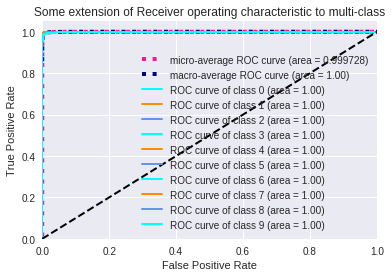

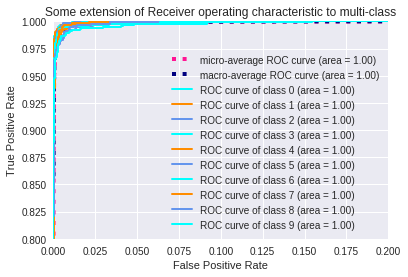

In [36]:

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=Y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_hat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_hat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
#******************************************
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#Building the Model with Only 5- Layers using Keras

In [21]:
model_relu_5 = Sequential()
#Layer 1
model_relu_5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
#Layer2
model_relu_5.add(Dense(384, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
#Layer3
model_relu_5.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
#Layer4
model_relu_5.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.250, seed=None)) )
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
#Layer5
model_relu_5.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.50, seed=None)) )
model_relu_5.add(BatchNormalization())
model_relu_5.add(Dropout(0.5))
model_relu_5.add(Dense(output_dim, activation='softmax'))

model_relu_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 300us/step - loss: 1.4782 - acc: 0.5211 - val_loss: 0.3505 - val_acc: 0.9009
Epoch 2/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.5603 - acc: 0.8330 - val_loss: 0.2111 - val_acc: 0.9391
Epoch 3/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.3779 - acc: 0.8946 - val_loss: 0.1565 - val_acc: 0.9547
Epoch 4/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.2932 - acc: 0.9216 - val_loss: 0.1379 - val_acc: 0.9620
Epoch 5/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.2509 - acc: 0.9322 - val_loss: 0.1223 - val_acc: 0.9682
Epoch 6/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.2245 - acc: 0.9420 - val_loss: 0.1156 - val_acc: 0.9698
Epoch 7/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.1983 - acc: 0.9479 - val_loss: 0.

Test score: 0.0784353492802009
Test accuracy: 0.9814


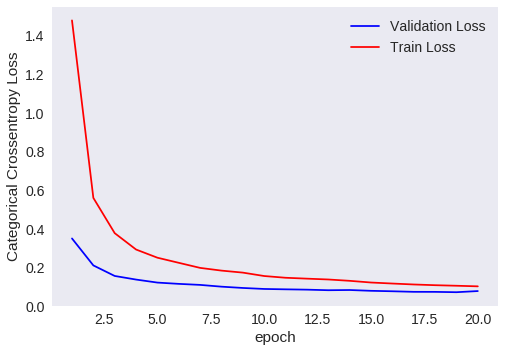

In [22]:
score = model_relu_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


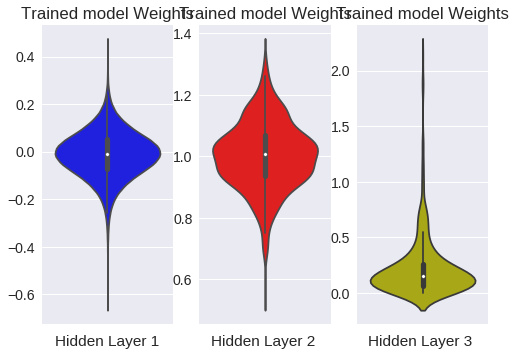

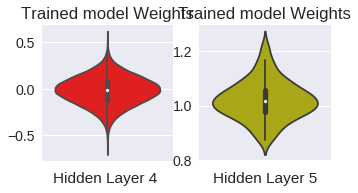

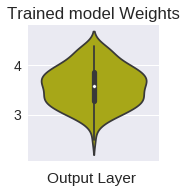

In [23]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')
plt.show()


plt.subplot(2, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(2, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='y')
plt.xlabel('Hidden Layer 5')
plt.show()


plt.subplot(2, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

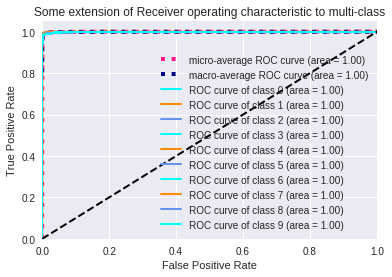

In [65]:
y_hat=model_relu_5.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=Y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_hat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    
    
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_hat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

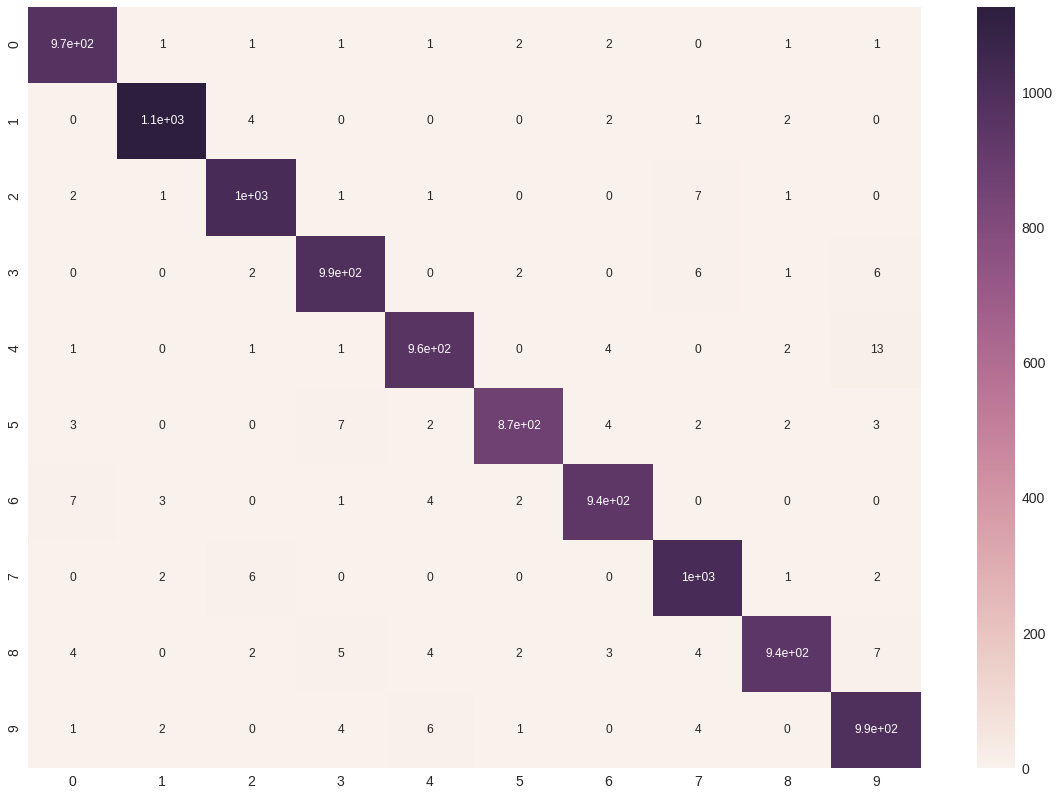

In [24]:
snn_predicted = np.argmax(y_hat, axis=1)
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(Y_test, axis=1), snn_predicted) 

# Visualiamos la matriz de confusión 
snn_df_cm = pd.DataFrame(snn_cm, range(10), range(10)) 
plt.figure(figsize = (20,14)) 
sns.set(font_scale=1.4) #for label size 
sns.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size 
plt.show()

In [25]:
snn_report = classification_report(np.argmax(Y_test, axis=1), snn_predicted)
print(snn_report)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.99      0.99      1032
          3       0.98      0.98      0.98      1010
          4       0.98      0.98      0.98       982
          5       0.99      0.97      0.98       892
          6       0.98      0.98      0.98       958
          7       0.98      0.99      0.98      1028
          8       0.99      0.97      0.98       974
          9       0.97      0.98      0.98      1009

avg / total       0.98      0.98      0.98     10000



#Observation 
1. We have loaded the Mnist dataset using library
2. I have spiltted the data into train and test 
3. I  have normalized the training and test dataset
4. I have converted the each output level into a 10dimension vector
6. I have intialized all the model parameters 
7. I have built a 2-Layer, 3Layer and 5-layer neural with Batch normalization and dropout and Relu as       my activation function. then i have printed the test loss and accuracy of each layer . 

In [18]:
data={'2_Layer_NN':[ 0.0581,0.9835],'3_layer_NN':[0.0637,0.9824],'5_layer_NN':[0.0760,0.9808]}
pd.DataFrame(data,index=['Test-loss','Accuracy'])


,2_Layer_NN,3_layer_NN,5_layer_NN
Test-loss,0.0581,0.0637,0.0760
Accuracy,0.9835,0.9824,0.9808
